<a href="https://colab.research.google.com/github/ustab/soldier_race_project_students/blob/main/soldier_race_project_students_(7)_F_1218_BURHANETTIN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (9,5)
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)


## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [185]:
path = "https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr"
df_male = pd.read_csv(path, encoding='ISO-8859-1')

In [186]:
path = "https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq"
df_female = pd.read_csv(path,  encoding='ISO-8859-1')


## Explore Data

In [187]:
df_male.sample(5)

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
607,12815,344,1513,349,223,1399,252,202,421,340,289,536,70,348,330,147,1146,291,925,662,540,393,1582,310,1179,269,1340,870,651,348,37,67,24,279,844,102,274,360,296,621,492,1204,90,217,203,153,596,208,347,74,376,442,1102,675,448,457,509,571,493,66,412,125,448,485,1535,120,440,273,1232,377,147,960,910,614,1916,1814,1488,1172,721,199,842,481,130,931,1839,560,391,1207,344,479,1033,1077,182,888,Male,6-Dec-10,Fort Bliss,Army National Guard,Combat Service Support,25U,Massachusetts,1,NaN,1,49,72,231,Right hand
2638,24779,227,1426,337,205,1312,240,200,416,330,265,497,74,328,321,143,971,221,891,604,501,354,1498,281,1023,243,1331,870,585,339,32,60,21,220,790,99,270,348,273,523,475,1116,85,201,186,160,547,184,322,70,334,355,1036,630,421,425,486,542,487,63,382,125,355,391,1409,110,436,271,1135,367,160,888,875,606,1791,1736,1425,1111,599,159,819,460,123,902,1583,453,328,895,206,372,1062,738,152,820,Male,21-Oct-11,Fort Bragg,Regular Army,Combat Arms,25A,India,8,East/Asian Indian,4,36,69,165,Right hand
2372,21967,273,1438,332,238,1333,267,214,422,383,284,527,79,334,330,149,1074,254,874,626,514,411,1510,287,1082,262,1288,831,613,347,35,65,22,261,787,112,287,345,315,623,472,1172,89,224,190,158,585,199,348,77,366,395,1066,630,460,480,495,560,481,75,430,115,402,440,1385,114,425,257,1191,352,150,904,892,578,1772,1751,1443,1124,661,191,856,456,136,895,1678,479,335,998,251,365,1035,913,177,861,Male,11-Aug-11,Fort Stewart,Regular Army,Combat Arms,11C,Florida,63,Indonesian Puerto Rican,3,20,70,210,Right hand
953,14095,297,1414,328,247,1284,283,200,426,408,290,561,77,330,320,146,1099,283,832,613,491,422,1487,321,1168,271,1248,788,731,409,35,60,19,295,839,112,273,329,332,645,457,1109,90,216,195,161,593,204,350,77,370,423,1011,575,480,481,445,528,469,75,443,126,413,448,1453,114,390,246,1266,357,153,959,864,568,1780,1737,1406,1064,685,199,774,437,137,838,1802,486,362,1034,265,414,1011,1016,178,851,Male,30-Jan-11,Fort Bliss,Army National Guard,Combat Support,42A,Washington,1,NaN,1,30,68,225,Right hand
798,13838,305,1562,363,234,1414,240,199,420,396,283,524,75,344,348,151,1049,256,943,645,522,418,1632,288,1143,281,1390,905,678,383,35,65,19,293,856,97,274,357,329,642,477,1204,87

In [188]:
df_male.columns

Index(['subjectid', 'abdominalextensiondepthsitting', 'acromialheight', 'acromionradialelength', 'anklecircumference', 'axillaheight', 'balloffootcircumference', 'balloffootlength', 'biacromialbreadth', 'bicepscircumferenceflexed',
       ...
       'Branch', 'PrimaryMOS', 'SubjectsBirthLocation', 'SubjectNumericRace', 'Ethnicity', 'DODRace', 'Age', 'Heightin', 'Weightlbs', 'WritingPreference'], dtype='object', length=108)

In [189]:
df_male.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4082 entries, 0 to 4081
Columns: 108 entries, subjectid to WritingPreference
dtypes: int64(99), object(9)
memory usage: 3.4+ MB


In [190]:
df_female.columns

Index(['SubjectId', 'abdominalextensiondepthsitting', 'acromialheight', 'acromionradialelength', 'anklecircumference', 'axillaheight', 'balloffootcircumference', 'balloffootlength', 'biacromialbreadth', 'bicepscircumferenceflexed',
       ...
       'Branch', 'PrimaryMOS', 'SubjectsBirthLocation', 'SubjectNumericRace', 'Ethnicity', 'DODRace', 'Age', 'Heightin', 'Weightlbs', 'WritingPreference'], dtype='object', length=108)

In [191]:
df_female.shape

(1986, 108)

In [192]:
df_female.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Columns: 108 entries, SubjectId to WritingPreference
dtypes: int64(99), object(9)
memory usage: 1.6+ MB


In [193]:
df_female.isnull().sum()

SubjectId                            0
abdominalextensiondepthsitting       0
acromialheight                       0
acromionradialelength                0
anklecircumference                   0
axillaheight                         0
balloffootcircumference              0
balloffootlength                     0
biacromialbreadth                    0
bicepscircumferenceflexed            0
bicristalbreadth                     0
bideltoidbreadth                     0
bimalleolarbreadth                   0
bitragionchinarc                     0
bitragionsubmandibulararc            0
bizygomaticbreadth                   0
buttockcircumference                 0
buttockdepth                         0
buttockheight                        0
buttockkneelength                    0
buttockpopliteallength               0
calfcircumference                    0
cervicaleheight                      0
chestbreadth                         0
chestcircumference                   0
chestdepth               

In [194]:
df_male.isnull().sum()

subjectid                            0
abdominalextensiondepthsitting       0
acromialheight                       0
acromionradialelength                0
anklecircumference                   0
axillaheight                         0
balloffootcircumference              0
balloffootlength                     0
biacromialbreadth                    0
bicepscircumferenceflexed            0
bicristalbreadth                     0
bideltoidbreadth                     0
bimalleolarbreadth                   0
bitragionchinarc                     0
bitragionsubmandibulararc            0
bizygomaticbreadth                   0
buttockcircumference                 0
buttockdepth                         0
buttockheight                        0
buttockkneelength                    0
buttockpopliteallength               0
calfcircumference                    0
cervicaleheight                      0
chestbreadth                         0
chestcircumference                   0
chestdepth               

In [195]:
df_male.shape

(4082, 108)

In [196]:
df_male.drop(columns='subjectid', inplace=True)
df_female.drop(columns='SubjectId', inplace=True)

In [214]:
dfs = pd.concat([df_male, df_female], axis=0, ignore_index=True)

In [215]:
def clean_columns(dataframe):
    for column in dfs:
        dfs.rename(columns = {column : column.lower().replace(" ", "_")},inplace = 1)
        return dfs

In [216]:
dfs.sample(2)

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
2977,305,1482,329,244,1355,265,193,450,384,316,589,76,334,322,145,1118,279,874,648,535,406,1552,326,1206,272,1342,858,738,412,33,62,29,268,807,107,263,344,322,650,480,1151,87,212,188,159,583,201,355,72,373,415,1054,620,481,496,493,562,496,83,427,129,407,452,1405,115,441,272,1306,357,166,926,930,600,1798,1789,1467,1092,692,200,804,468,133,895,1812,481,381,1071,274,347,1093,1049,179,894,Male,19-Jan-12,Fort Huachuca,Regular Army,Combat Service Support,25Q,Nebraska,1,NaN,1,21,71,225,Right hand
3930,213,1476,345,205,1366,240,182,417,318,282,467,69,314,297,141,940,229,917,650,553,328,1527,283,915,203,1322,879,607,368,38,62,26,236,785,98,249,346,273,516,481,1098,86,206,191,160,579,202,322,64,330,343,1093,615,423,453,499,557,508,66,364,121,384,421,1425,108,444,277,1121,375,155,909,915,610,1827,1771,1463,1163,538,162,806,480,127,905,1589,450,299,808,198,358,1093,687,168,862,Male,24-Mar-12,Camp Shelby,Army National Guard,Combat Support,68W,Arkansas,51,Cherokee,1,20,71,155,Left hand


In [ ]:
dfs.isnull().sum()

In [ ]:
dfs.describe().T

In [ ]:
dfs.DODRace.value_counts()

In [207]:
dfs.shape

(5769, 107)

In [208]:
6068 - 5769

299

In [218]:
dfs['DODRace'].isnull().sum()

0

In [219]:
dfs.columns

Index(['abdominalextensiondepthsitting', 'acromialheight', 'acromionradialelength', 'anklecircumference', 'axillaheight', 'balloffootcircumference', 'balloffootlength', 'biacromialbreadth', 'bicepscircumferenceflexed', 'bicristalbreadth',
       ...
       'Branch', 'PrimaryMOS', 'SubjectsBirthLocation', 'SubjectNumericRace', 'Ethnicity', 'DODRace', 'Age', 'Heightin', 'Weightlbs', 'WritingPreference'], dtype='object', length=107)

In [220]:
dfs.head(1)

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand


In [221]:
dfd=dfs.drop(columns=['Date','Installation','Component','Branch', 'Ethnicity',	'PrimaryMOS',	'SubjectsBirthLocation'], inplace=True)


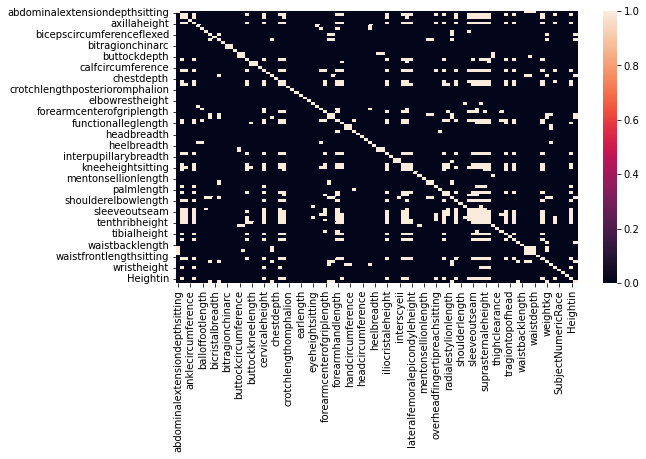

In [222]:
sns.heatmap(dfs.corr() > 0.85)
plt.show()

In [223]:
dfs.select_dtypes('O')

,Gender,WritingPreference
0,Male,Right hand
1,Male,Left hand
2,Male,Left hand
3,Male,Right hand
4,Male,Right hand
...,...,...
6063,Female,Right hand
6064,Female,Right hand
6065,Female,Right hand
6066,Female,Right hand


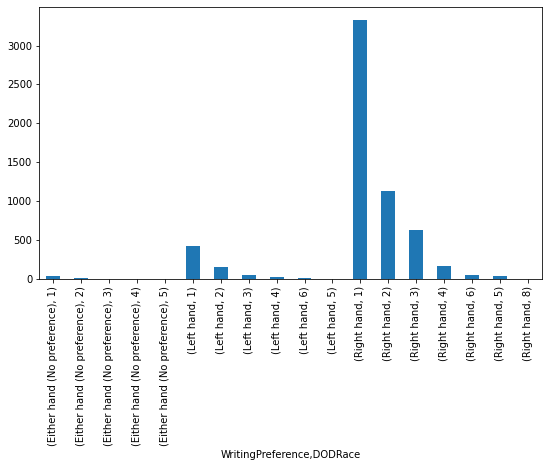

In [236]:
dfs.groupby('WritingPreference').DODRace.value_counts().plot(kind='bar')


In [234]:
import seaborn as sns

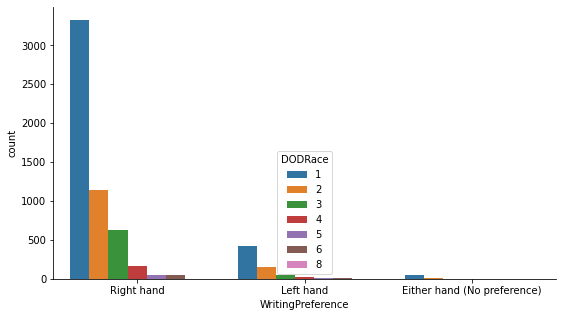

In [239]:
# sns.barplot(df, x=df.writing_preference, y=df.writing_preference.value_counts)

# sns.barplot(data=df, x="writing_preference", y="dod_race", hue="dod_race")

ax = sns.countplot(data=dfs, x='WritingPreference', hue="DODRace")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [254]:
X = dfs.drop('DODRace', axis=1)

In [255]:
y = dfs['DODRace']

In [257]:
X = pd.get_dummies(X, drop_first=True)

In [258]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [259]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (4854, 100)
Train target shape   :  (4854,)
Test features shape  :  (1214, 100)
Test target shape    :  (1214,)


In [248]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

In [279]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbpipeline

## 1. Logistic model

### Vanilla Logistic Model

In [264]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [281]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
pipe_log_model = Pipeline


### Logistic Model GridsearchCV

## 2. SVC

### Vanilla SVC model 

###  SVC Model GridsearchCV

## 3. RF

### Vanilla RF Model

### RF Model GridsearchCV

## 4. XGBoost

### Vanilla XGBoost Model

### XGBoost Model GridsearchCV

---
---

---
---

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [260]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [261]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

## SVC Over/Under Sampling

## Xgboost Over/ Under Sampling

- Evaluation metrics 
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

In [ ]:
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_test, y_pred)

In [ ]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred)

#  SHAP

https://towardsdatascience.com/shap-explain-any-machine-learning-model-in-python-24207127cad7

In [ ]:
# !pip install shap

In [ ]:
import shap
explainer = shap.Explainer(log_model,X_train)
start_index = 203
end_index = 204
shap_values = explainer.shap_values(X_test[start_index:end_index])

In [ ]:
shap_values

In [ ]:
print(shap_values[0].shape)

In [ ]:
# %% >> Visualize local predictions
shap.initjs()
# Force plot
prediction = log_model.predict(X_test[start_index:end_index])[0]
print(f"The log_model predicted: {prediction}")
shap.force_plot(explainer.expected_value[1],
                shap_values[1],
                X_test[start_index:end_index], # for values
                feature_names= X.columns,) 

In [ ]:
shap.summary_plot(shap_values, X_train,max_display=300,feature_names = X.columns)

# Before the Deployment 
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___